In [8]:
#%pip install numpy matplotlib tabulate

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate

## Definindo as fórmulas

**Diferença avançada**

$$
y'(x_i) = \frac{y(x_i + h) - y(x_i)}{h}
$$

**Diferença atrasada**

$$
y'(x_i) = \frac{y(x_i) - y(x_i - h)}{h}
$$

**Diferença centrada**

$$
y'(x_i) = \frac{y(x_i + h) - y(x_i - h)}{2h}
$$

In [10]:
# Diferença avançada
diff_avancada = lambda y, x_i, h: (y(x_i + h) - y(x_i)) / h
# Diferença atrasada
diff_atrasada = lambda y, x_i, h: (y(x_i) - y(x_i - h)) / h
# Differeça centrada
diff_centrada = lambda y, x_i, h: (y(x_i + h) - y(x_i - h)) / (2 * h)

**Erro local**

$e(x_n) = y(x_n) - y_n$

**Erro relativo**

$ER = |\frac{\text{solução exata} - \text{solução numérica}}{\text{solução exata}}|$

In [11]:
# Erro local
erro_local = lambda y, x_n, y_n: y(x_n) - y_n
# Erro relativo
erro_relativo = lambda exata, numerica: abs((exata - numerica) / exata)

## Definindo as funções e suas derivadas

A função escolhida para o item **e)** foi a função logística,
por ser simples em sua forma original,
mas ter o comportamento e diferenciação não tão simples assim.
$$
f(x) = \frac{1}{1 + e^{-x}}
$$
$$
f'(x) = \frac{e^x}{(e^x + 1)^2}
$$

As demais funções estã como no exercício.

In [12]:
functions = [
    {
        'name': 'a',
        'f': lambda x: np.sin(np.exp(2 * x)),
        'df': lambda x: 2 * np.exp(2 * x) * np.cos(np.exp(2 * x)),
        'range': (0, 1),
    },
    {
        'name': 'b',
        'f': lambda x: np.sin(x) / np.log(x),
        'df': lambda x: (np.cos(x) * np.log(x) - np.sin(x) / x) / (np.log(x))**2,
        'range': (6, 7),
    },
    {
        'name': 'c',
        'f': lambda x: np.log(x) * np.sin(x),
        'df': lambda x: np.sin(x) / x + np.log(x) * np.cos(x),
        'range': (0.5, 1.5),
    },
    {
        'name': 'd',
        'f': lambda x: np.exp(np.sin(x)),
        'df': lambda x: np.cos(x) * np.exp(np.sin(x)),
        'range': (0.5, 1.5),
    },
    {
        'name': 'e',
        'f': lambda x: 1 / (1 + np.exp(-x)),
        'df': lambda x: np.exp(x) / (np.exp(x) + 1)**2,
        'range': (-1, 1),
    }
]

## Testes

In [13]:
# Definindo todos os h possíveis
# 0.1 até 10^-8, com passo 10^-1
h_values = np.logspace(-1, -6, 6)
h_values

array([1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06])

Item a, h = 0.1
Item a, h = 0.01
Item a, h = 0.001
Item a, h = 0.0001
Item a, h = 1e-05
Item a, h = 1e-06
Item b, h = 0.1
Item b, h = 0.01
Item b, h = 0.001
Item b, h = 0.0001
Item b, h = 1e-05
Item b, h = 1e-06
Item c, h = 0.1
Item c, h = 0.01
Item c, h = 0.001
Item c, h = 0.0001
Item c, h = 1e-05
Item c, h = 1e-06
Item d, h = 0.1
Item d, h = 0.01


C:\Users\Daniel\AppData\Local\Temp\ipykernel_26080\1803883011.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


Item d, h = 0.001
Item d, h = 0.0001
Item d, h = 1e-05
Item d, h = 1e-06
Item e, h = 0.1
Item e, h = 0.01
Item e, h = 0.001
Item e, h = 0.0001
Item e, h = 1e-05
Item e, h = 1e-06


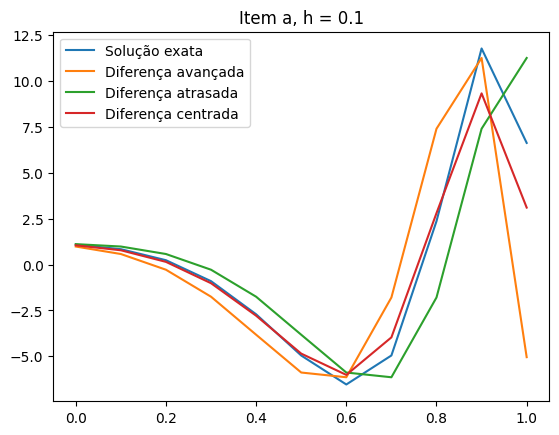

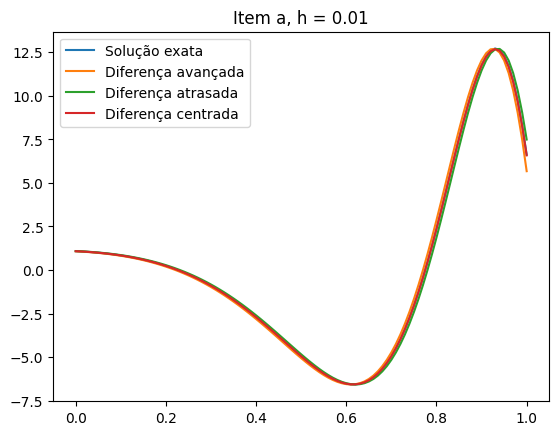

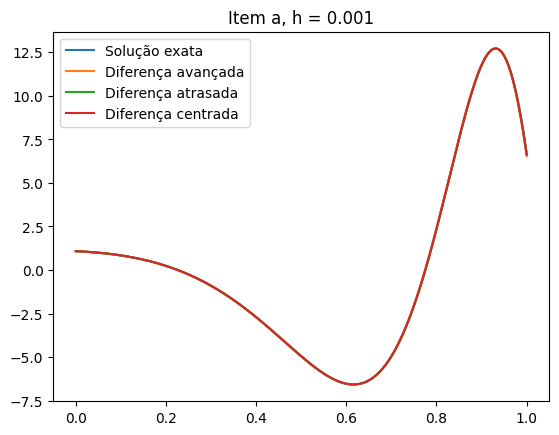

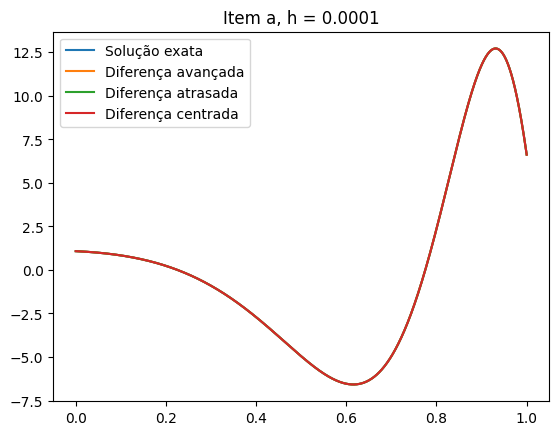

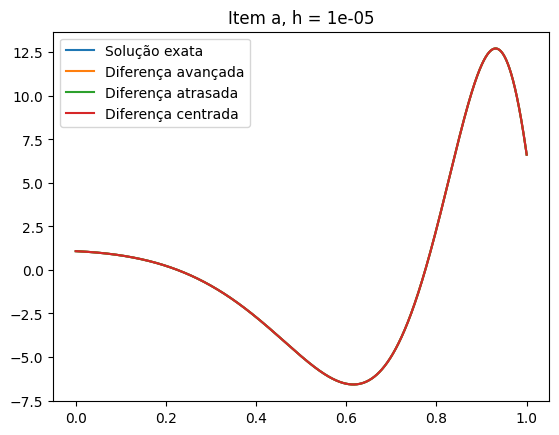

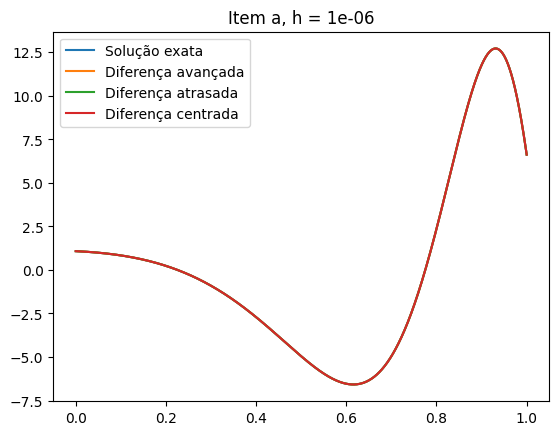

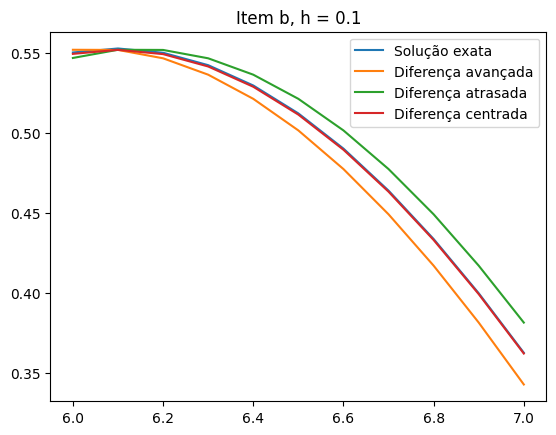

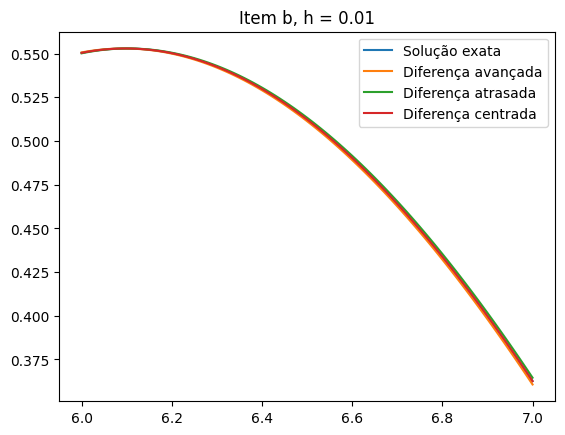

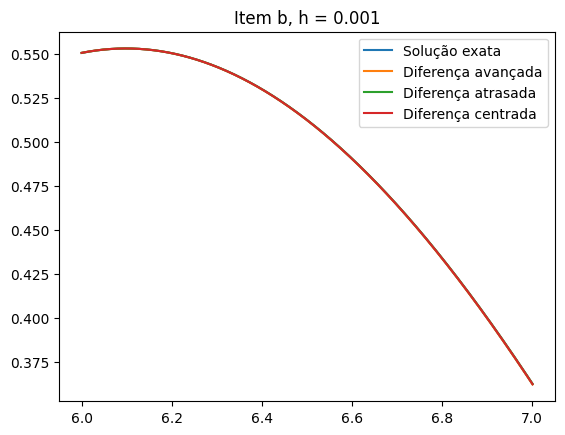

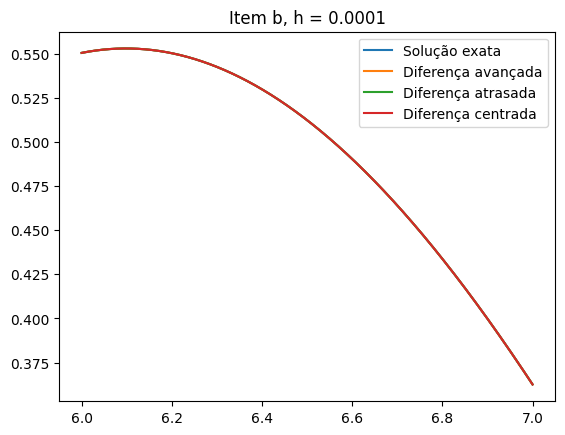

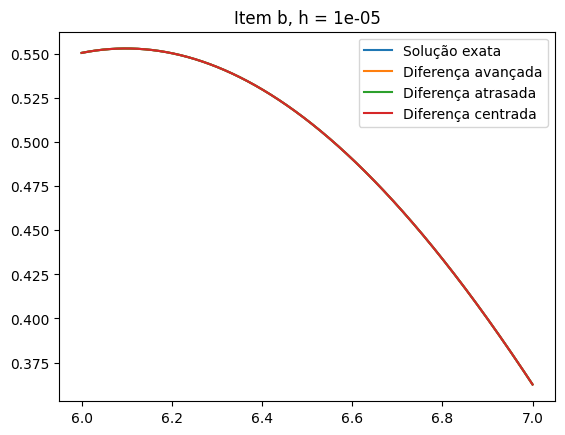

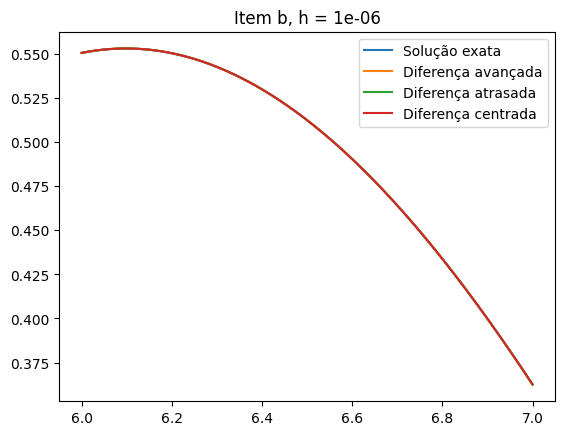

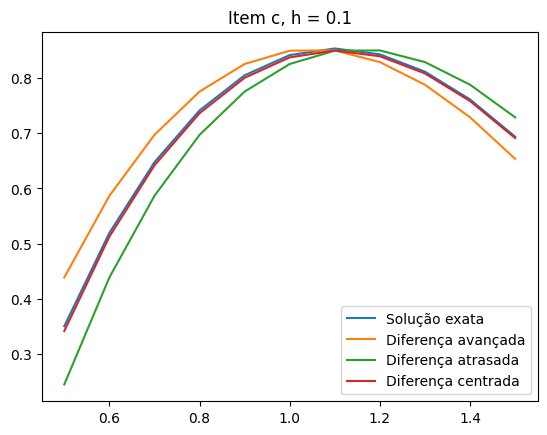

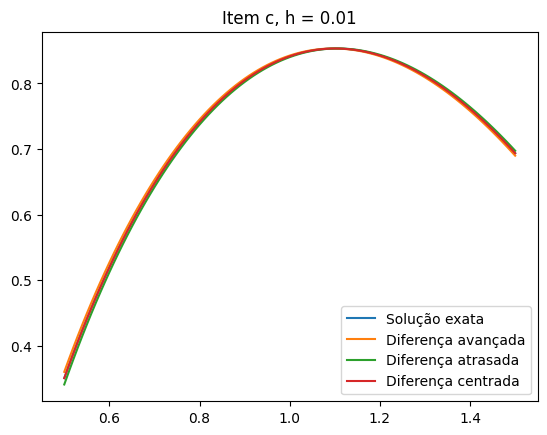

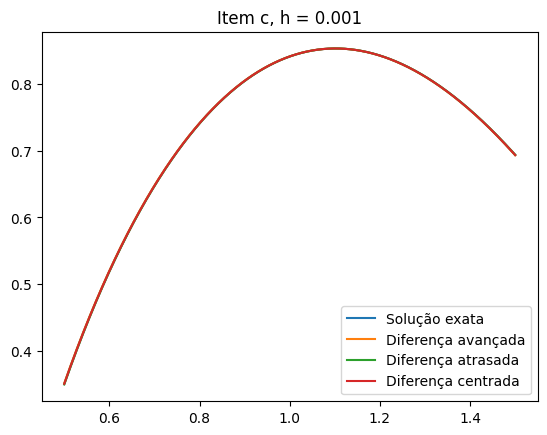

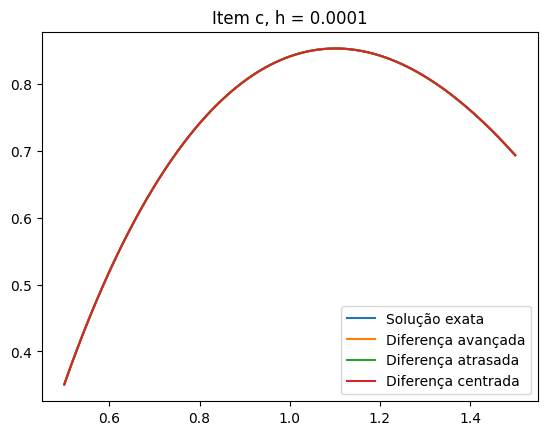

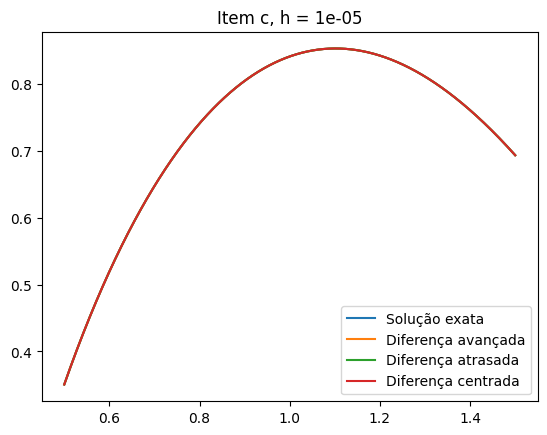

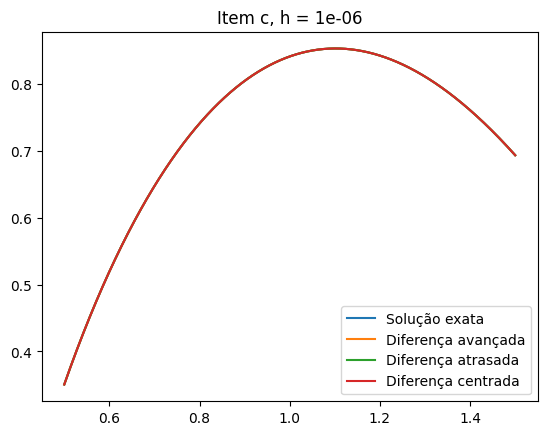

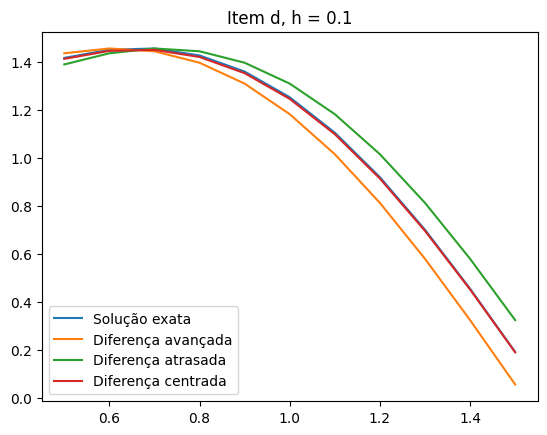

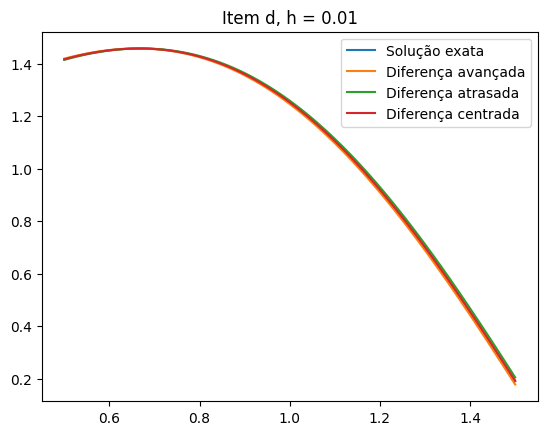

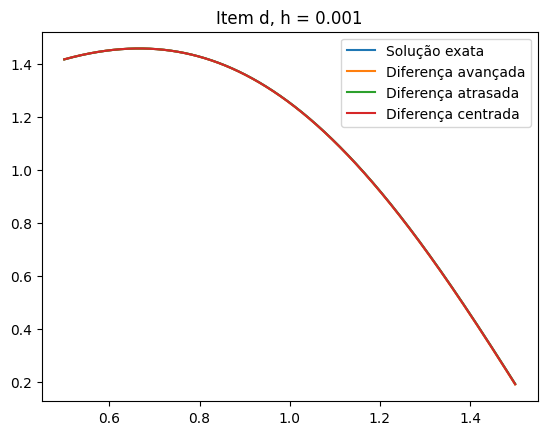

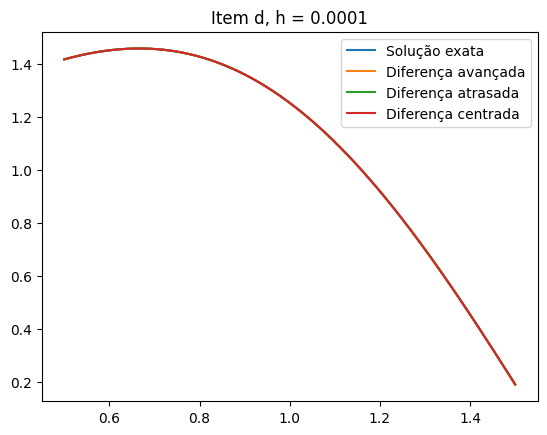

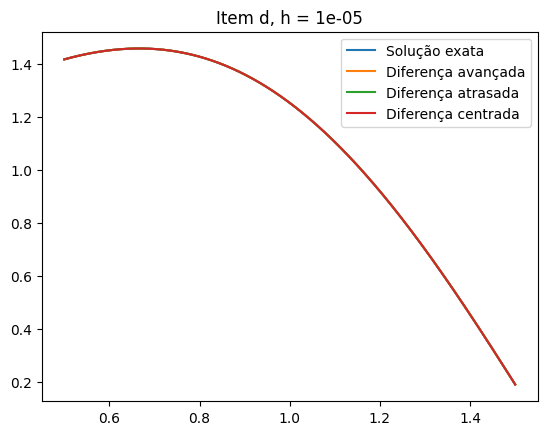

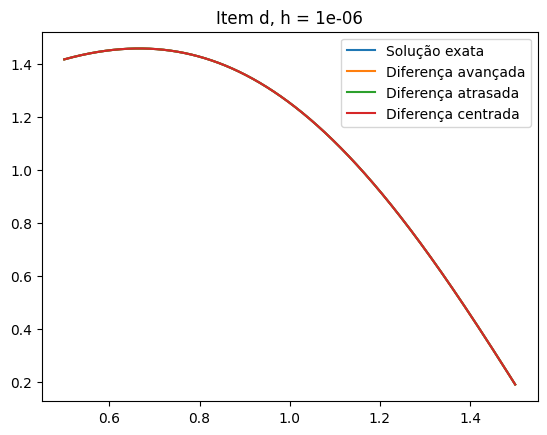

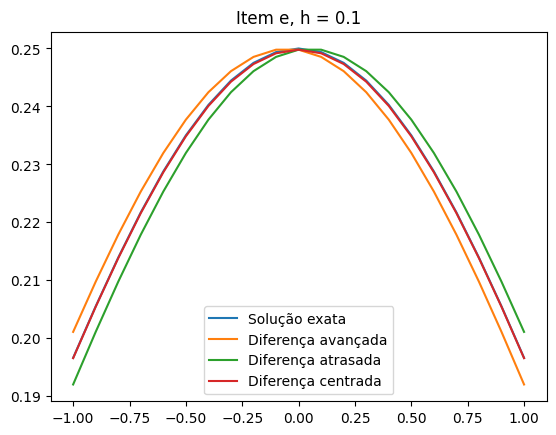

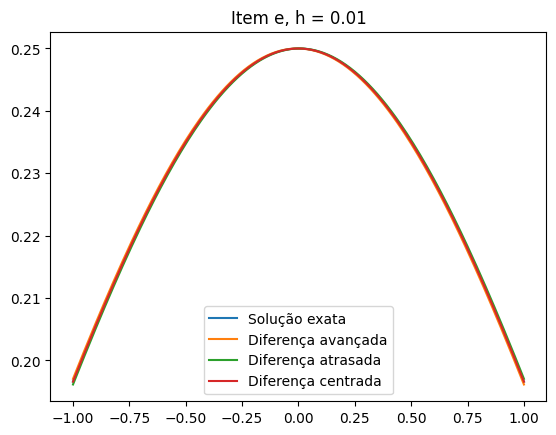

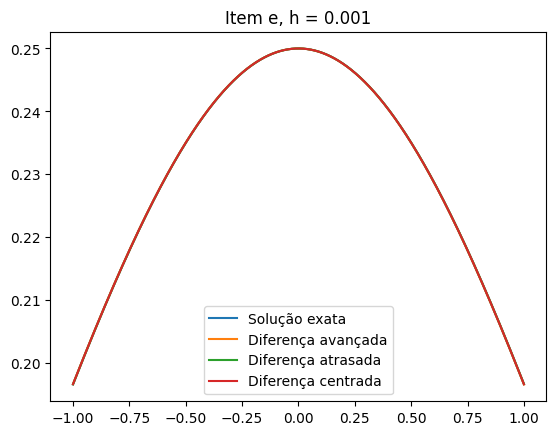

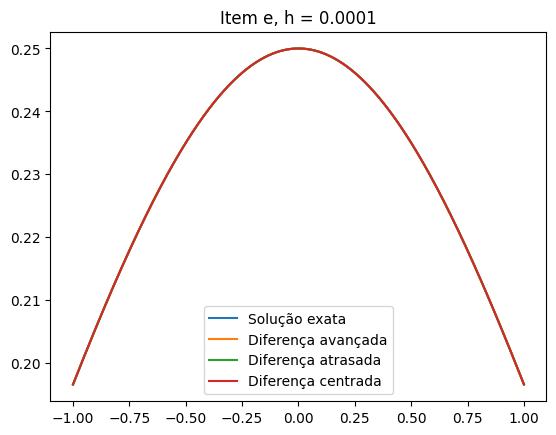

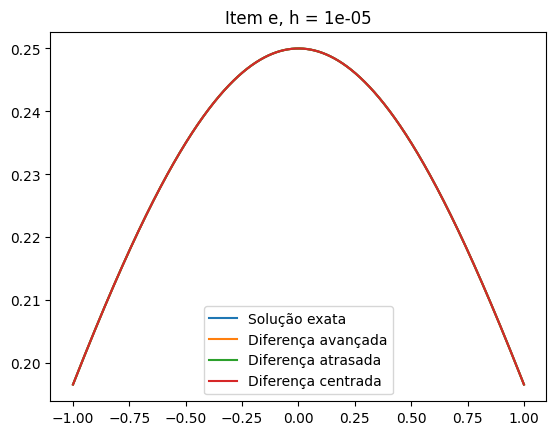

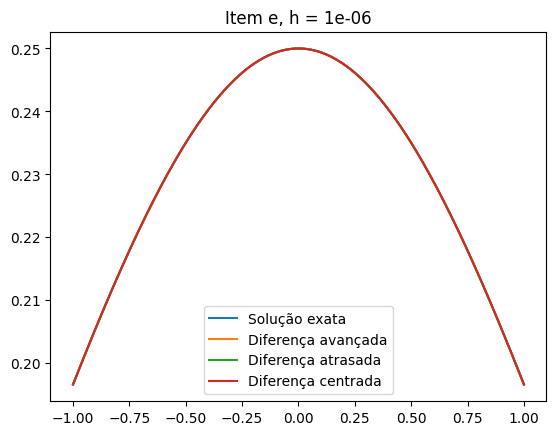

In [14]:
diffs = [
    {'name': 'avançada', 'diff': diff_avancada},
    {'name': 'atrasada', 'diff': diff_atrasada},
    {'name': 'centrada', 'diff': diff_centrada},
]
# Testando para cada função
for f in functions:
    # Mesmo que o h varie, a referência sempre será o 0.1 para as tabelas
    x_basline = np.arange(f['range'][0], f['range'][1] + 0.1, 0.1)
    for h in h_values:
        # Calcula a malha de x com base no h
        x = np.arange(f['range'][0], f['range'][1] + h, h)
        # Calcula o resultado exato
        y = f['df'](x)
        # Plot
        fig, ax = plt.subplots()
        ax.plot(x, y, label='Solução exata')
        # Calcula e plota as aproximações
        for diff in diffs:
            y_n = diff['diff'](f['f'], x, h)
            ax.plot(x, y_n, label = 'Diferença ' + diff['name'])
        ax.legend()
        # add title
        plt.title(f'Item {f["name"]}, h = {h}')
        # save as png in edcompt_tarefa1_out
        plt.savefig(f'edcomp_tarefa1_out/{f["name"]}_h_{h}.png')
        # Montando a tabela de resultado baseado em x_baseline
        print(f'Item {f["name"]}, h = {h}')
        y_baseline = f['df'](x_basline)
        res = {
            'avançada': {'y_n': [], 'erro_local': [], 'erro_relativo': []},
            'atrasada': {'y_n': [], 'erro_local': [], 'erro_relativo': []},
            'centrada': {'y_n': [], 'erro_local': [], 'erro_relativo': []},
        }
        for diff in diffs:
            y_n = diff['diff'](f['f'], x_basline, h)
            erro_local_v = erro_local(f['df'], x_basline, y_n)
            erro_relativo_v = erro_relativo(y_baseline, y_n)
            res[diff['name']]['y_n'] = y_n
            res[diff['name']]['erro_local'] = erro_local_v
            res[diff['name']]['erro_relativo'] = erro_relativo_v
        # decupando a tabela
        headers = ['x', "y'(x)", 'avn', 'err_loc_avn', 'err_rel_avn', 'atr', 'err_loc_atr', 'err_rel_atr', 'cen', 'err_loc_cen', 'err_rel_cen']
        table = []
        for i in range(len(x_basline)):
            row = [x_basline[i], y_baseline[i]]
            for diff in diffs:
                row.append(res[diff['name']]['y_n'][i])
                row.append(res[diff['name']]['erro_local'][i])
                row.append(res[diff['name']]['erro_relativo'][i])
            table.append(row)
        latex_table = tabulate(table, headers=headers, tablefmt='latex')
        # save as txt in edcompt_tarefa1_out
        with open(f'edcomp_tarefa1_out/{f["name"]}_h_{h}.txt', 'w') as fi:
            fi.write(latex_table)